# `t0err` efficiency comparison: MDC2020au vs MDC2020aw

In [1]:
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load
from draw import Draw

import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import numpy as np

from pyutils.pyplot import Plot

In [2]:
ana_labels_c = [
    "SU2020c_CRY_onspill-LH_au", 
    "SU2020c_CRY_onspill-LH_aw",
    "SU2020c_signal_onspill-LH_au",
    "SU2020c_signal_onspill-LH_aw"
]

ana_labels_d = [
    "SU2020d_CRY_onspill-LH_au", 
    "SU2020d_CRY_onspill-LH_aw",
    "SU2020d_signal_onspill-LH_au",
    "SU2020d_signal_onspill-LH_aw"
]

In [3]:


def load(ana_labels):
    results = {}
    for ana_label in ana_labels:
        loader = Load(
            in_path = f"../../output/results/{ana_label}"
        )
        results[ana_label] = loader.load_pkl() 
    return results

results_c = load(ana_labels_c)
results_d = load(ana_labels_d)

[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020c_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020c_signal_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020d_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020d_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020d_CRY_onspi

## Plot t0err

Wrote ../../output/images/comp/h10_t0err_au_aw.png


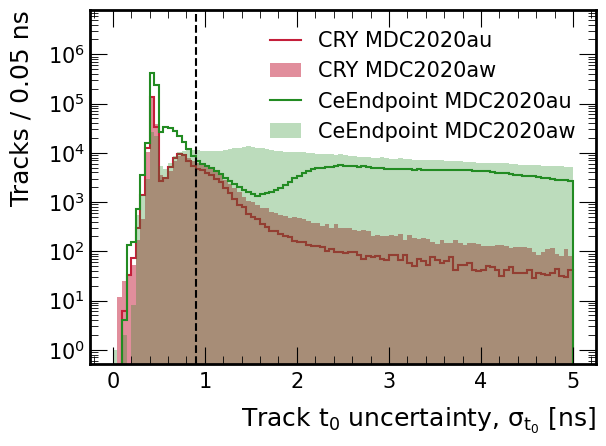

In [4]:
styles = {
    ana_labels_c[0] : {"color": "#C41E3A"},
    ana_labels_c[1] : {"color": "#C41E3A", "histtype": "bar", "alpha": 0.5},
    ana_labels_c[2] : {"color": "#228B22"},
    ana_labels_c[3] : {"color": "#228B22", "histtype": "bar", "alpha": 0.3},
}

leg_labels = {
    ana_labels_c[0] : "CRY MDC2020au",
    ana_labels_c[1] : "CRY MDC2020aw",
    ana_labels_c[2] : "CeEndpoint MDC2020au",
    ana_labels_c[3] : "CeEndpoint MDC2020aw"
}

fig, ax = plt.subplots()

for ana_label in ana_labels_c:
    hist_obj = results_c[ana_label]["hists"]["t0err"] 
    h_sel = hist_obj[{"selection": ["Preselect"]}]
     # Plot step histograms
    h_sel.plot1d(
        **styles[ana_label],
        overlay="selection", 
        ax=ax, 
        label=leg_labels[ana_label],
        flow="none"
    )

line_kwargs = {"linestyle": "--", "color": "black", "linewidth": 1.5, "alpha": 1.0}
ax.axvline(0.9, **line_kwargs)
ax.set_yscale("log")
ax.legend(frameon=False) 
ax.set_ylabel("Tracks / 0.05 ns")
current_ylim = ax.get_ylim()
ax.set_ylim(current_ylim[0], current_ylim[1] * 10)
plt.tight_layout()
out_path = "../../output/images/comp/h10_t0err_au_aw.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

## Compare efficiency

In [5]:
plotter = Plot()
# help(plotter.plot_graph_overlay)

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1


In [6]:
leg_labels = {
    ana_labels_c[0] : "CRY MDC2020au",
    ana_labels_c[1] : "CRY MDC2020aw",
    ana_labels_c[2] : "CeEndpoint MDC2020au",
    ana_labels_c[3] : "CeEndpoint MDC2020aw",

    ana_labels_d[0] : "CRY MDC2020au",
    ana_labels_d[1] : "CRY MDC2020aw",
    ana_labels_d[2] : "CeEndpoint MDC2020au",
    ana_labels_d[3] : "CeEndpoint MDC2020aw"
}


In [7]:
leg_labels

{'SU2020c_CRY_onspill-LH_au': 'CRY MDC2020au',
 'SU2020c_CRY_onspill-LH_aw': 'CRY MDC2020aw',
 'SU2020c_signal_onspill-LH_au': 'CeEndpoint MDC2020au',
 'SU2020c_signal_onspill-LH_aw': 'CeEndpoint MDC2020aw',
 'SU2020d_CRY_onspill-LH_au': 'CRY MDC2020au',
 'SU2020d_CRY_onspill-LH_aw': 'CRY MDC2020aw',
 'SU2020d_signal_onspill-LH_au': 'CeEndpoint MDC2020au',
 'SU2020d_signal_onspill-LH_aw': 'CeEndpoint MDC2020aw'}

In [8]:

def get_eff(results, ana_labels):

    sig_eff_dict, veto_eff_dict = {}, {}
    for ana_label in ana_labels:
        analysis = results[ana_label]["analysis"]
    
        if "signal" in ana_label:
            print(ana_label)
            sig_eff          = float(analysis.at[2, "CE-like (wide)"])
            sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
            sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
            sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
            
            sig_eff_dict[leg_labels[ana_label]] = {
                "sig_eff": sig_eff,
                "sig_eff_err": sig_eff_err
            }
            
        elif "CRY" in ana_label:     
            print(ana_label)
            veto_eff         = float(analysis.at[2, "No veto (wide)"])
            veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
            veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
            veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
    
            veto_eff_dict[leg_labels[ana_label]] = {
                "veto_eff": veto_eff,
                "veto_eff_err": veto_eff_err
            }

    return sig_eff_dict, veto_eff_dict

sig_eff_dict_c, veto_eff_dict_c = get_eff(results_c, ana_labels_c)
sig_eff_dict_d, veto_eff_dict_d = get_eff(results_d, ana_labels_d)

SU2020c_CRY_onspill-LH_au
SU2020c_CRY_onspill-LH_aw
SU2020c_signal_onspill-LH_au
SU2020c_signal_onspill-LH_aw
SU2020d_CRY_onspill-LH_au
SU2020d_CRY_onspill-LH_aw
SU2020d_signal_onspill-LH_au
SU2020d_signal_onspill-LH_aw


In [9]:
veto_eff_dict_c

{'CRY MDC2020au': {'veto_eff': 99.96009349523972,
  'veto_eff_err': array([0.01819442, 0.01249836])},
 'CRY MDC2020aw': {'veto_eff': 99.93997599039616,
  'veto_eff_err': array([0.04604273, 0.02606274])}}

In [10]:
veto_eff_dict_d

{'CRY MDC2020au': {'veto_eff': 99.95693367786392,
  'veto_eff_err': array([0.01593583, 0.01163309])},
 'CRY MDC2020aw': {'veto_eff': 99.96163028649386,
  'veto_eff_err': array([0.01509328, 0.01083343])}}

In [11]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict_c.keys())
# sig_effs_c = [data["sig_eff"] for data in sig_eff_dict_c.values()]
# sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_c.values()],
#                       [data["sig_eff_err"][1] for data in sig_eff_dict_c.values()]])
# sig_effs_d = [data["sig_eff"] for data in sig_eff_dict_d.values()]
# sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_d.values()],
#                       [data["sig_eff_err"][1] for data in sig_eff_dict_d.values()]])

# # Create offset positions for side-by-side bars
# x = np.arange(len(labels))
# width = 0.35

# ax1.bar(x - width/2, sig_effs_c, width, yerr=sig_errs_c, capsize=3, 
#         fill=False, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
# ax1.bar(x + width/2, sig_effs_d, width, yerr=sig_errs_d, capsize=3, 
#         fill=False, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
# ax1.set_xticks(x)
# ax1.set_ylim(0, 27.5)
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')
# ax1.legend()

# # Veto efficiency - FIXED: using correct data sources
# labels = list(veto_eff_dict_c.keys())
# veto_effs_c = [data["veto_eff"] for data in veto_eff_dict_c.values()]  # Fixed: was using _d
# veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_c.values()],  # Fixed: was using _d
#                        [data["veto_eff_err"][1] for data in veto_eff_dict_c.values()]])  # Fixed: was using _d
# veto_effs_d = [data["veto_eff"] for data in veto_eff_dict_d.values()]
# veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_d.values()],
#                        [data["veto_eff_err"][1] for data in veto_eff_dict_d.values()]])

# x = np.arange(len(labels))
# ax2.bar(x - width/2, veto_effs_c, width, yerr=veto_errs_c, capsize=3, 
#         fill=False, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
# ax2.bar(x + width/2, veto_effs_d, width, yerr=veto_errs_d, capsize=3, 
#         fill=False, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(x)
# ax2.set_xticklabels(labels, rotation=45)
# # ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')
# ax2.legend()

# plt.tight_layout()
# out_path = "../../output/images/comp/bo_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()  # Add this if you want to display the plot

Wrote ../../output/images/comp/bo_eff_au_aw_comp.png


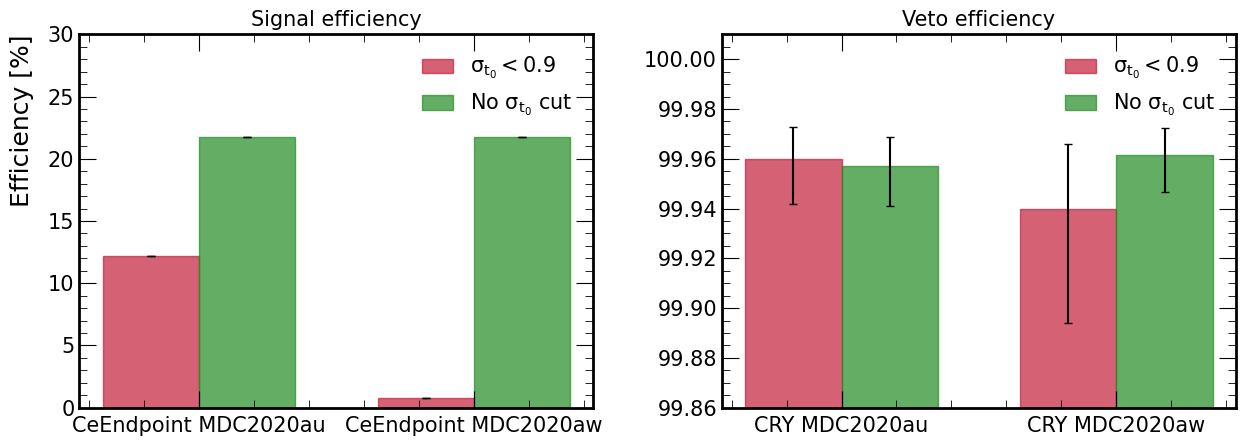

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency
labels = list(sig_eff_dict_c.keys())
sig_effs_c = [data["sig_eff"] for data in sig_eff_dict_c.values()]
sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_c.values()],
                      [data["sig_eff_err"][1] for data in sig_eff_dict_c.values()]])
sig_effs_d = [data["sig_eff"] for data in sig_eff_dict_d.values()]
sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_d.values()],
                      [data["sig_eff_err"][1] for data in sig_eff_dict_d.values()]])

# Create offset positions for side-by-side bars
x = np.arange(len(labels))
width = 0.35

ax1.bar(x - width/2, sig_effs_c, width, yerr=sig_errs_c, capsize=3, 
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
ax1.bar(x + width/2, sig_effs_d, width, yerr=sig_errs_d, capsize=3, 
        color="#228B22", alpha=0.7, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
ax1.set_xticks(x)
ax1.set_ylim(0, 30)
ax1.set_xticklabels(labels) #, rotation=45)
ax1.set_ylabel('Efficiency [%]')
ax1.set_title('Signal efficiency')
ax1.legend()

# Veto efficiency - FIXED: using correct data sources
labels = list(veto_eff_dict_c.keys())
veto_effs_c = [data["veto_eff"] for data in veto_eff_dict_c.values()]  # Fixed: was using _d
veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_c.values()],  # Fixed: was using _d
                       [data["veto_eff_err"][1] for data in veto_eff_dict_c.values()]])  # Fixed: was using _d
veto_effs_d = [data["veto_eff"] for data in veto_eff_dict_d.values()]
veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_d.values()],
                       [data["veto_eff_err"][1] for data in veto_eff_dict_d.values()]])

x = np.arange(len(labels))
ax2.bar(x - width/2, veto_effs_c, width, yerr=veto_errs_c, capsize=3, 
        color="#C41E3A", alpha=0.7, edgecolor="#C41E3A", label=r"$\sigma_{t_0} < 0.9$")
ax2.bar(x + width/2, veto_effs_d, width, yerr=veto_errs_d, capsize=3, 
        color="#228B22", alpha=0.7, edgecolor="#228B22", label=r"No $\sigma_{t_0}$ cut")
ax2.set_ylim(99.86, 100.01)
ax2.set_xticks(x)
ax2.set_xticklabels(labels) #, rotation=25)
# ax2.set_ylabel('Efficiency [%]')
ax2.set_title('Veto efficiency')
ax2.legend()

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_au_aw_comp.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()  # Add this if you want to display the plot

In [13]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict_c.keys())
# sig_effs_c = [data["sig_eff"] for data in sig_eff_dict_c.values()]
# sig_errs_c = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_c.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict_c.values()]])
# sig_effs_d = [data["sig_eff"] for data in sig_eff_dict_d.values()]
# sig_errs_d = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict_d.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict_d.values()]])

# ax1.bar(range(len(labels)), sig_effs_c, yerr=sig_errs_c, capsize=3, fill=False, edgecolor="red", label=r"$\sigma{t{0}} < 0.9$")
# ax1.bar(range(len(labels)), sig_effs_d, yerr=sig_errs_d, capsize=3, fill=False, edgecolor="red", label=r"No $\sigma{t{0}}$ cut")
# ax1.set_xticks(range(len(labels)))
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')

# # Veto efficiency
# labels = list(veto_eff_dict_c.keys())
# veto_effs_c = [data["veto_eff"] for data in veto_eff_dict_c.values()]
# veto_errs_c = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_c.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict_c.values()]])

# veto_effs_d = [data["veto_eff"] for data in veto_eff_dict_d.values()]
# veto_errs_d = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict_d.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict_d.values()]])

# ax2.bar(range(len(labels)), veto_effs_c, yerr=veto_errs_c, capsize=3, fill=False, edgecolor="blue", label=r"$\sigma{t{0}} < 0.9$")
# ax2.bar(range(len(labels)), veto_effs_d, yerr=veto_errs_d, capsize=3, fill=False, edgecolor="blue", label=r"No $\sigma{t{0}}$ cut")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(range(len(labels)))

# ax2.set_xticklabels(labels, rotation=45)
# ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')

# plt.tight_layout()
# out_path="../../output/images/comp/bo_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")


In [14]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*6.4, 1.75*4.8))

# # Signal efficiency
# labels = list(sig_eff_dict.keys())
# sig_effs = [data["sig_eff"] for data in sig_eff_dict.values()]
# sig_errs = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict.values()],
#                      [data["sig_eff_err"][1] for data in sig_eff_dict.values()]])

# ax1.bar(range(len(labels)), sig_effs, yerr=sig_errs, capsize=3, fill=False, edgecolor="red")
# ax1.set_xticks(range(len(labels)))
# ax1.set_xticklabels(labels, rotation=45)
# ax1.set_ylabel('Efficiency [%]')
# ax1.set_title('Signal efficiency')

# # Veto efficiency
# labels = list(veto_eff_dict.keys())
# veto_effs = [data["veto_eff"] for data in veto_eff_dict.values()]
# veto_errs = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict.values()],
#                       [data["veto_eff_err"][1] for data in veto_eff_dict.values()]])

# ax2.bar(range(len(labels)), veto_effs, yerr=veto_errs, capsize=3, fill=False, edgecolor="blue")
# ax2.set_ylim(99.86, 100)
# ax2.set_xticks(range(len(labels)))

# ax2.set_xticklabels(labels, rotation=45)
# ax2.set_ylabel('Efficiency [%]')
# ax2.set_title('Veto efficiency')

# plt.tight_layout()
# out_path="../../output/images/comp/bar_eff_au_aw_comp.png"
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")


In [15]:
# more_ana_labels = [
#     "SU2020d_CRY_onspill-LH_au", 
#     "SU2020d_CRY_onspill-LH_aw",
#     "SU2020d_signal_onspill-LH_au",
#     "SU2020d_signal_onspill-LH_aw"
# ]

# ana_labels.append(more_ana_labels)

# leg_labels = {
#     ana_labels[4] : "CRY MDC2020au",
#     ana_labels[5] : "CRY MDC2020aw",
#     ana_labels[6] : "CeEndpoint MDC2020au",
#     ana_labels[7] : "CeEndpoint MDC2020aw"
# }

# results = {}
# for ana_label in ana_labels:
#     loader = Load(
#         in_path = f"../../output/results/{ana_label}"
#     )
#     results[ana_label] = loader.load_pkl() 